# MLP Regressor Model 

## Model Overview

This section implements a **Multilayer Perceptron (MLP) Regressor** to predict house sale prices using the Ames Housing dataset.  
Unlike Linear and Polynomial Regression, the MLP model introduces **non-linear learning** through neural network layers, allowing it to capture more complex relationships in housing features.

---

## Data Preparation

The dataset includes **1,460 records and 81 features**, split into:
- **80% training data (1,168 records)**
- **20% validation data (292 records)**

The features are separated into:
- **Numeric Features:** 37 (imputed and scaled)
- **Categorical Features:** 43 (imputed and one-hot encoded)

After preprocessing, the transformed dataset contains **286 numerical input features**.

---

## Preprocessing Pipeline

The same scikit-learn `ColumnTransformer` pipeline was used:

### Numeric Transformer:
- Median imputation  
- StandardScaler normalization  

### Categorical Transformer:
- Most frequent imputation  
- OneHotEncoder  

This unified preprocessing pipeline ensures consistent and clean input for the neural network model.

---

## MLP Model Architecture

The MLP model is defined as:

- **Hidden layers:** (100, 50)  
- **Activation:** ReLU  
- **Solver:** Adam optimizer  
- **Max iterations:** 500  
- **Random State:** 42  

These settings allow the model to:
- Learn non-linear relationships  
- Adapt weights using gradient descent  
- Balance training speed and accuracy  

A convergence warning may appear due to early stopping of the optimizer, which is common in neural network training.

---

## Model Training

The model was trained on the fully preprocessed training dataset.  
The MLP learns patterns through forward and backward propagation, adjusting weights to minimize prediction error.

Once trained, predictions are generated on the validation set.

---

## Model Evaluation

The MLP model was evaluated using **regression metrics**:

### Regression Metrics:
- **Mean Squared Error (MSE)**  
- **Mean Absolute Error (MAE)**  
- **R² Score**
- **RMSE (Root Mean Squared Error)**

These metrics quantify the prediction accuracy and error magnitude.

---

## Classification-Based Evaluation

To provide additional interpretability, SalePrice values were grouped into three price categories:

- **Low**
- **Mid**
- **High**

Both predicted and actual prices were binned to evaluate how well the model distinguishes between price groups.

### Metrics computed:
- **Precision**
- **Recall**
- **F1-Score**
- **Confusion Matrix**

This allows us to interpret how well the model categorizes homes across price ranges, even though the task remains fundamentally a regression problem.

---

# Visual Analysis

- **Actual vs Predicted:** Scatter plot showing how close the predicted prices are to the actual sale prices.

- **Residual Plot:** Visualizes prediction errors to show whether the model over- or under-predicts across price ranges.

- **Residual Distribution:** Histogram showing how the prediction errors are distributed, indicating overall error spread and bias.

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.neural_network import MLPRegressor

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
train_path = 'data/train.csv'
train_df = pd.read_csv(train_path)
print("Train shape:", train_df.shape)
train_df.head()

Train shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
target = 'SalePrice'
drop_cols = [target]
if target+'_log' in train_df.columns:
    drop_cols.append(target+'_log')

X = train_df.drop(columns=drop_cols)
y = train_df[target]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Validation shape:", X_val.shape)

Training shape: (1168, 80)
Validation shape: (292, 80)


In [26]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("Numeric features:", len(numeric_cols))
print("Categorical features:", len(categorical_cols))

Numeric features: 37
Categorical features: 43


In [27]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
print("Preprocessing done.")

Preprocessing done.


In [28]:
model = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu',
                     solver='adam', max_iter=500, random_state=42)
model.fit(X_train_processed, y_train)

y_pred = model.predict(X_val_processed)

In [29]:
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MLP Regression Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

MLP Regression Metrics:
MSE: 1158672885.089013
RMSE: 34039.284438557355
MAE: 19670.02448426996
R²: 0.8489408593857023


In [30]:
y_val_cat = pd.qcut(y_val, q=3, labels=["Low", "Mid", "High"])
y_pred_cat = pd.qcut(y_pred, q=3, labels=["Low", "Mid", "High"])

Classification Report (Price Categories):
              precision    recall  f1-score   support

        High       0.92      0.92      0.92        98
         Low       0.84      0.84      0.84        98
         Mid       0.76      0.76      0.76        96

    accuracy                           0.84       292
   macro avg       0.84      0.84      0.84       292
weighted avg       0.84      0.84      0.84       292



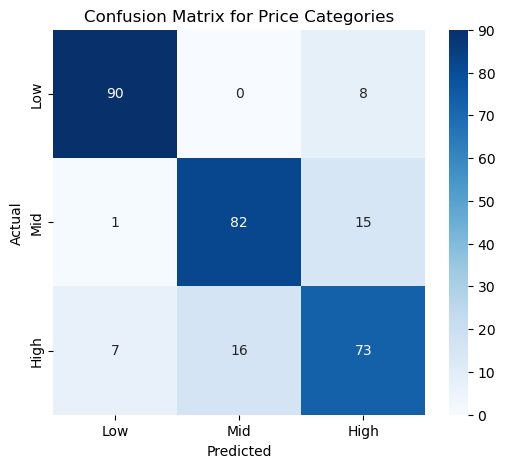

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report (Price Categories):")
print(classification_report(y_val_cat, y_pred_cat))

cm = confusion_matrix(y_val_cat, y_pred_cat)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low","Mid","High"], yticklabels=["Low","Mid","High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Price Categories")
plt.show()

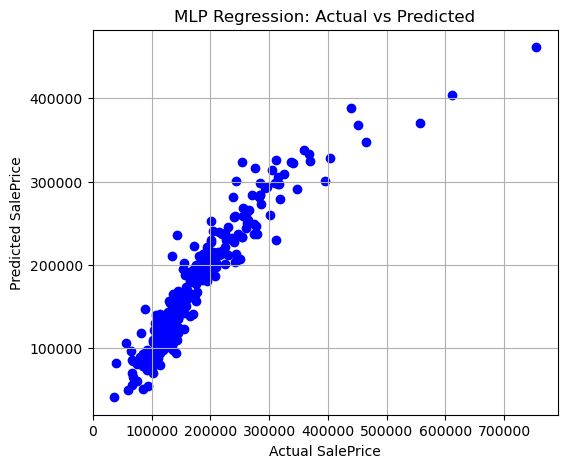

In [32]:
plt.figure(figsize=(6,5))
plt.scatter(y_val, y_pred, color='blue')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("MLP Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

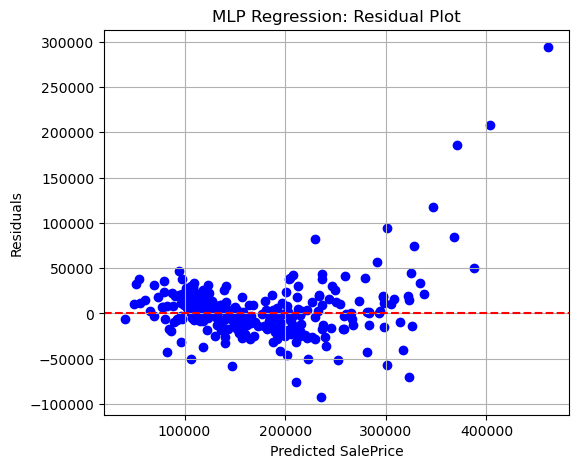

In [33]:
residuals = y_val - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.title("MLP Regression: Residual Plot")
plt.grid(True)
plt.show()

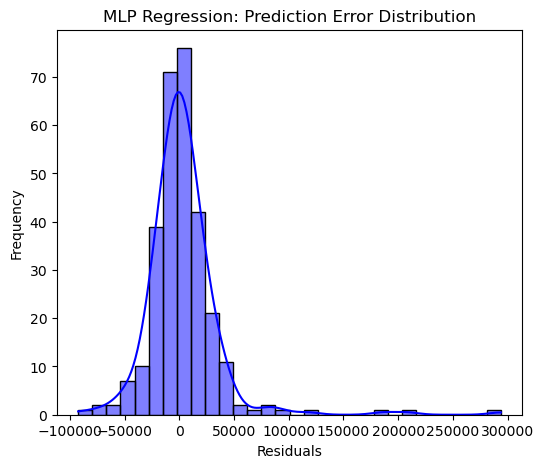

In [34]:
plt.figure(figsize=(6,5))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title("MLP Regression: Prediction Error Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()